In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Given constants for the EBM
S_0,epsilon,alpha,sigma,C = 1367, 0.6, 0.3, 5.67e-8, 85

delta_t  = 14
t = np.arange(0,310+delta_t,delta_t)
T_eq = (((1-alpha)*S_0)/(4*epsilon*sigma))**(1/4)
A  =  10
T_0 =  299.5797 

def exact(time,T_eq,A=10):
    Temperature  = np.zeros(len(time))
    for  t,i in zip(time, list(range(len(time)))):
        Temperature[i]  = (A*np.exp((-4*epsilon*sigma*(T_eq**3))/(C)*t)+T_eq)
    return Temperature

def f(t,T):
    return ((1. - alpha)*S_0 - 4. *epsilon*sigma*(T**4. ))/(4. *C)

def model(T_0,t,f,delta_t):
    T_approx   = [T_0 ]
    for time in range(len(t)-1): 
        K_1 = f(t[time],T_approx[time])       
        K_2 = f(t[time] + 0.75 * delta_t,T_approx[time]+0.75 * delta_t * K_1)   
        T_approx.append(T_approx[time]+ (1/3) * delta_t * (K_1 + 2* K_2)) 
    return T_approx

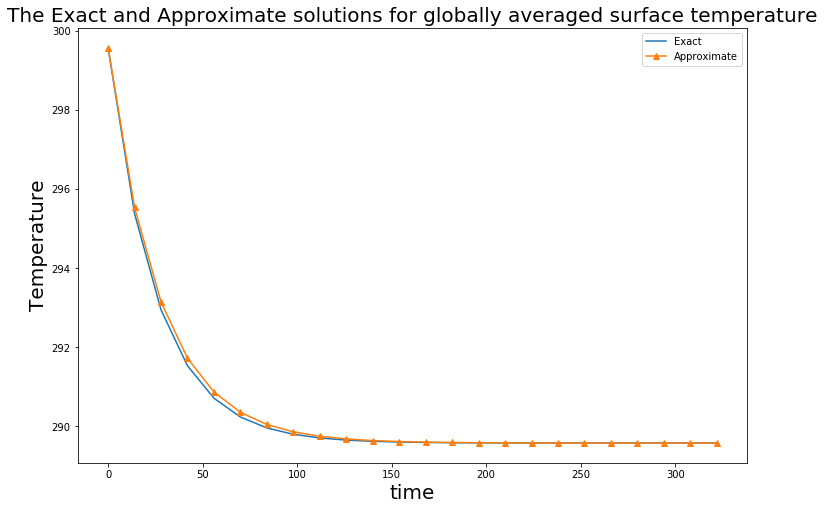

In [7]:
plt.figure(1,figsize=(12,8))
plt.plot(t,exact(t,T_eq,A=10),label="Exact")
plt.plot(t,model(T_0,t,f,delta_t),marker='^',label="Approximate")
plt.legend()
plt.xlabel("time", fontsize =20)
plt.ylabel("Temperature", fontsize =20)
plt.title("The Exact and Approximate solutions for globally averaged surface temperature",fontsize =20)
plt.show()